### Effects of bike-sharing service
by Hanna Pashchenko 

### Investigation Overview
In this investigation, I wanted to look at the relationship between user typer. What is the most profitable for the Ford GoBike Company. The main focus was on the distance and the duration based on type of users. 

### Dataset Overview
The data consisted of the approximately +5 millions recorded trips over the last 3 years (2017-2020)

In [17]:
# import all needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import datetime

%matplotlib inline

In [18]:
# read and download the dataset into a pandas dataframe
df = pd.read_csv('final_ford_go_bike.csv', low_memory=False)

In [19]:
# set up a new group for further investigation 
df_customer = df.query('user_type == "Customer"')['bike_id'].count()
df_subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()

customer_prop = df_customer / df['bike_id'].count()
subscriber_prop = df_subscriber / df['bike_id'].count()

In [20]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['month_name']=df['start_time'].dt.strftime('%B')
df['weekday']=df['start_time'].dt.strftime('%a')
df.month_name = df.month_name.astype('category')
df.weekday = df.weekday.astype('category')

### The Distribution of User Types in Ford GoBike Users

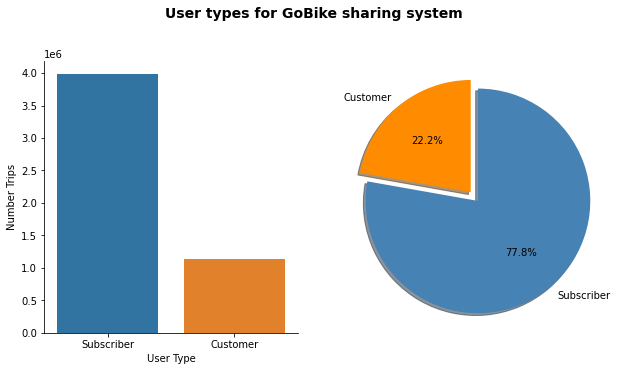

In [21]:
plt.figure(figsize = [10, 5])
plt.rc('axes.spines', top = False, right = False)

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df, x="user_type", order=df.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Number Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User types for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

### Weekly and monthly preferences by User Types 

###### Subscribers use a service a more often on weekdays:
- use a bike-sharing service between 8-9 am and 4-6 pm to commute at work and back

###### Customers use a service more often on weekends:
- customers using a bike share service seems to increase through the weekend
- the numbers of users are significantly growth from July to November 


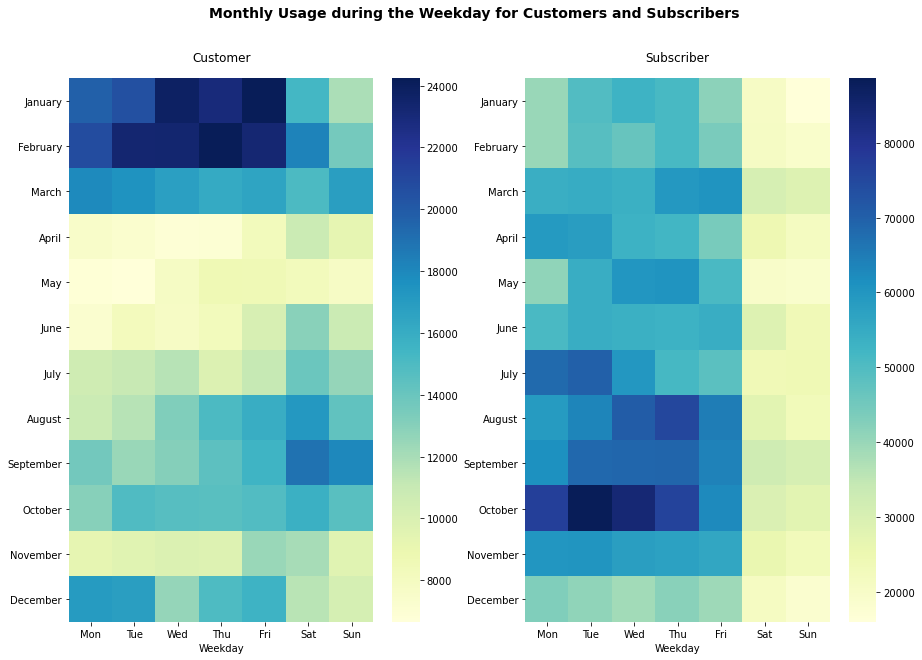

In [22]:
# Setting the weekday order
df['weekday'] = pd.Categorical(df['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                          ordered=True)
df['month_name'] = pd.Categorical(df['month_name'], categories=['January','February','March', 'April', 'May', 'June', 'July', 'August', 
                                              'September', 'October', 'November', 'December'], ordered=True)
plt.figure(figsize=(15,10))
plt.suptitle('Monthly Usage during the Weekday for Customers and Subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
customer = df.query('user_type == "Customer"').groupby(["month_name", "weekday"])["bike_id"].size().reset_index()
df1_customer = customer.pivot('month_name', 'weekday', 'bike_id')
sb.heatmap(df1_customer, cmap="YlGnBu")
plt.title("Customer", y=1.020)
plt.xlabel('Weekday')
plt.ylabel('');

# heatmap for subscribers
plt.subplot(1, 2, 2)
subscriber = df.query('user_type == "Subscriber"').groupby(["month_name", "weekday"])["bike_id"].size().reset_index()
df1_subscriber = subscriber.pivot('month_name', 'weekday', 'bike_id')
sb.heatmap(df1_subscriber, cmap="YlGnBu")
plt.title("Subscriber", y=1.020)
plt.xlabel('Weekday')
plt.ylabel('');

### Distances Travel by User types and Month
We can see that the customers prefer to use the Bikeshare on weekends and for long trip destination, and the subscribers use the service on Monday-Friday just for short destination, the most.

In [23]:
import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [24]:
df['distance_km'] = df.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)
df.groupby('user_type')['distance_km'].mean()

user_type
Customer      2.225533
Subscriber    1.530753
Name: distance_km, dtype: float64

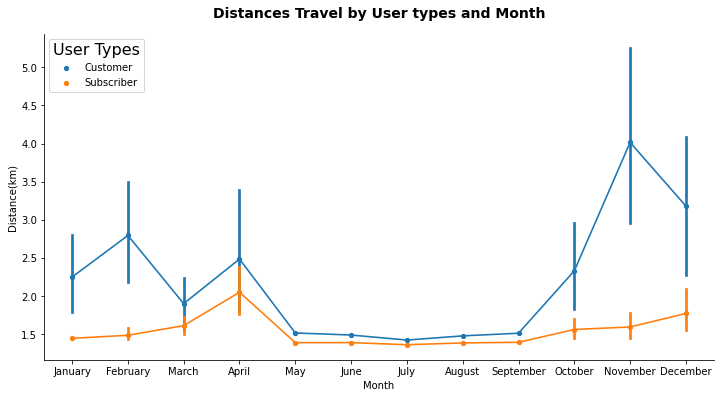

In [25]:
plt.figure(figsize=(12,6))

ax = sb.pointplot(data=df, x ='month_name', y = 'distance_km', hue= 'user_type', scale=.6)
plt.title('Distances Travel by User types and Month', y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Month')
plt.ylabel('Distance(km)')
leg = ax.legend()
leg.set_title('User Types', prop={'size':16})
ax = plt.gca()